In [4]:
# remove the notebook root logger.\n",
import logging
import pandas as pd
import datetime
logger = logging.getLogger()
logger.handlers = []

filename = "https://raw.githubusercontent.com/antoinecarme/TimeSeriesData/master/Stat_FR_CommExt/merged/French_Wine_Export_in_Euros_Some_Countries.csv"
French_Wine_Export_in_Euros_DF = pd.read_csv(filename)

lDateColumn = 'Month'
French_Wine_Export_in_Euros_DF[lDateColumn] = pd.to_datetime(French_Wine_Export_in_Euros_DF[lDateColumn], format="%Y-%m-%d")
French_Wine_Export_in_Euros_DF.head(5)


,Month,ALSACE_BLANC_BE,ALSACE_BLANC_CA,ALSACE_BLANC_CH,ALSACE_BLANC_CN,ALSACE_BLANC_DE,ALSACE_BLANC_GB,ALSACE_BLANC_HK,ALSACE_BLANC_JP,ALSACE_BLANC_NL,...,RHÔNE_ROUGE_CA,RHÔNE_ROUGE_CH,RHÔNE_ROUGE_CN,RHÔNE_ROUGE_DE,RHÔNE_ROUGE_GB,RHÔNE_ROUGE_HK,RHÔNE_ROUGE_JP,RHÔNE_ROUGE_NL,RHÔNE_ROUGE_OTHER,RHÔNE_ROUGE_US
0,2012-01-01,1131852,571940,257116,140013,357516,344274,51043,329883,624695,...,800628,650236,1127393,783952,1513332,335710,916965,314654,35418,1260510
1,2012-02-01,857289,585556,187917,89805,505896,424953,80220,239242,899144,...,795356,680567,188827,868576,1277664,197072,318522,516140,36604,2136484
2,2012-03-01,1438501,834142,679281,103577,583887,352675,102980,394945,1093638,...,873858,1318538,856382,627236,2343448,132200,605914,410308,43197,3264810
3,2012-04-01,986602,866221,523202,203456,515903,403517,52773,260953,874217,...,1004028,919493,460815,829432,1861188,128164,472522,290407,45396,2631466
4,2012-05-01,991668,1061702,611369,80327,767522,627232,78115,680323,994697,...,2098300,632778,239200,934532,2215922,202210,337894,284868,41469,2945175


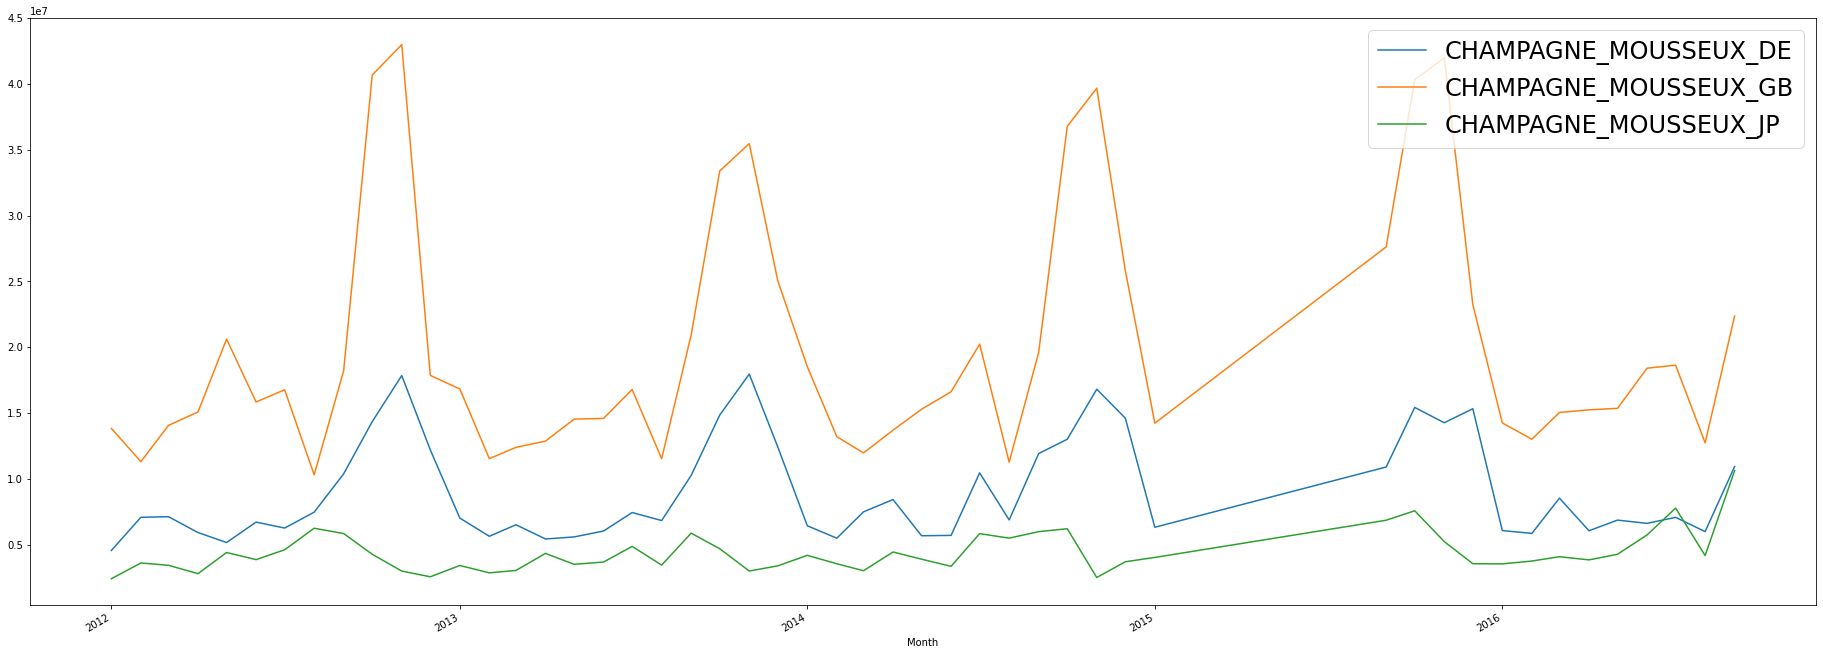

In [6]:
%matplotlib inline

French_Wine_Export_in_Euros_DF.plot('Month',
                                    ['CHAMPAGNE_MOUSSEUX_DE', 'CHAMPAGNE_MOUSSEUX_GB', 'CHAMPAGNE_MOUSSEUX_JP'],
                                    figsize=(32, 12)).legend(loc='best', fontsize=24)


In [7]:
Wines = "ALSACE BEAUJOLAIS BORDEAUX BOURGOGNE CHAMPAGNE EUROPE FRANCE LANGUEDOC LOIRE OTHER RHÔNE".split()
Variants = ['BLANC', 'MOUSSEUX', 'ROUGE']
Countries = ['GB', 'US', 'DE', 'BE', 'CN', 'JP', 'CH', 'HK', 'NL', 'CA', 'OTHER']


In [8]:
# A lot of possibilities , but only 176 are available ;)
len(Wines) * len(Variants) * len(Countries) 

363

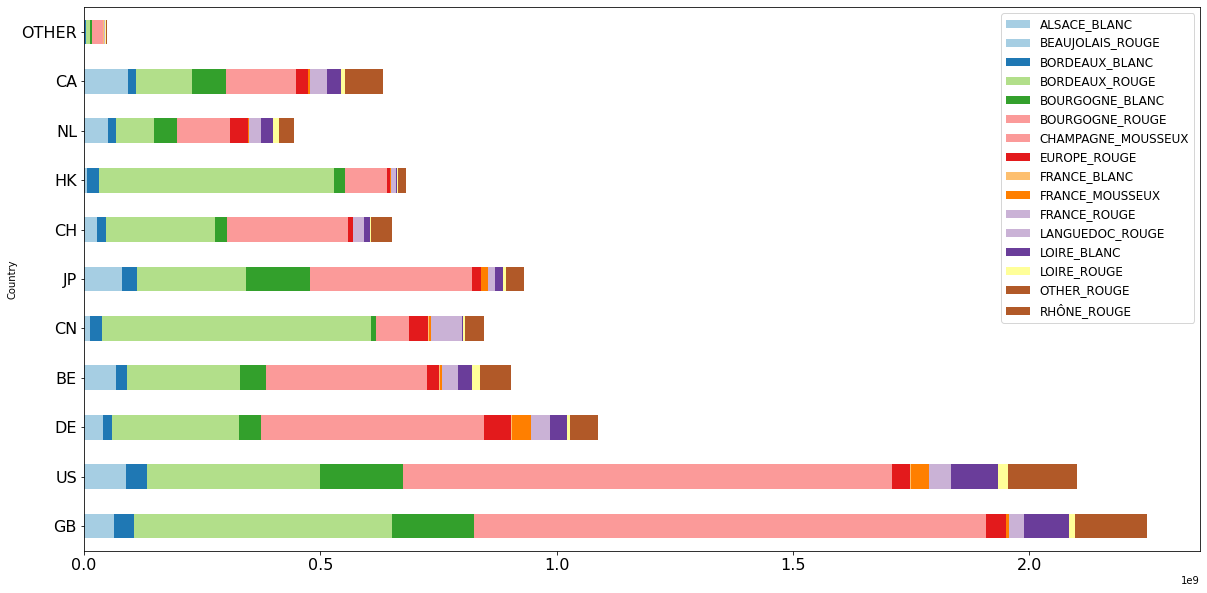

In [9]:
from IPython.display import display
rows = []
cols = []
for cntry in Countries:
    cntry_columns = [col for col in French_Wine_Export_in_Euros_DF.columns if col.endswith('_' + cntry)]
    cols = []
    row = [cntry]
    for col in cntry_columns:
        col1 = col.replace('_' + cntry, "")
        sum1 = French_Wine_Export_in_Euros_DF[col].sum()
        row.append(sum1)
        cols.append(col1)
    rows.append(row)

plot_df = pd.DataFrame(rows, columns=['Country'] + cols)
plot_df.set_index('Country').plot.barh(stacked=True, figsize=(20, 10),
                                       fontsize=16, colormap='Paired').legend(loc='best', fontsize=12)


In [11]:
Regions = ['EUROPE', 'AMERICA', 'EUROPE', 'EUROPE', 'ASIA',
           'ASIA', 'EUROPE',  'ASIA', 'EUROPE', 'AMERICA', 'OTHER_REGION']
lDict = dict(zip(Countries, Regions))

# simplify !!!!
Variants = ['BLANC', 'ROUGE']
Wines = Wines[0:3]
Countries = Countries[0:5]

# Hierarchy defintion
rows_list = []
for v in Variants:
    for w in Wines:
        for c in Countries:
            col = w + "_" + v + "_" + c
            region = lDict[c]
            if col in French_Wine_Export_in_Euros_DF.columns:
                rows_list.append([col, c, region, 'WORLD'])
# NOTE: NE BO SLO-> UPORABI VARMA
lLevels = ['Wine', 'Country', 'Region', 'WORLD']
lHierarchy = {}
lHierarchy['Levels'] = lLevels
lHierarchy['Data'] = pd.DataFrame(rows_list, columns=lLevels)
lHierarchy['Type'] = "Hierarchical"

lHierarchy

{'Levels': ['Wine', 'Country', 'Region', 'WORLD'],
 'Data':                    Wine Country   Region  WORLD
 0       ALSACE_BLANC_GB      GB   EUROPE  WORLD
 1       ALSACE_BLANC_US      US  AMERICA  WORLD
 2       ALSACE_BLANC_DE      DE   EUROPE  WORLD
 3       ALSACE_BLANC_BE      BE   EUROPE  WORLD
 4       ALSACE_BLANC_CN      CN     ASIA  WORLD
 5     BORDEAUX_BLANC_GB      GB   EUROPE  WORLD
 6     BORDEAUX_BLANC_US      US  AMERICA  WORLD
 7     BORDEAUX_BLANC_DE      DE   EUROPE  WORLD
 8     BORDEAUX_BLANC_BE      BE   EUROPE  WORLD
 9     BORDEAUX_BLANC_CN      CN     ASIA  WORLD
 10  BEAUJOLAIS_ROUGE_GB      GB   EUROPE  WORLD
 11  BEAUJOLAIS_ROUGE_US      US  AMERICA  WORLD
 12  BEAUJOLAIS_ROUGE_DE      DE   EUROPE  WORLD
 13  BEAUJOLAIS_ROUGE_BE      BE   EUROPE  WORLD
 14  BEAUJOLAIS_ROUGE_CN      CN     ASIA  WORLD
 15    BORDEAUX_ROUGE_GB      GB   EUROPE  WORLD
 16    BORDEAUX_ROUGE_US      US  AMERICA  WORLD
 17    BORDEAUX_ROUGE_DE      DE   EUROPE  WORLD
 18    BOR